# South African Language Identification Hackathon.

___

### Overview.

South Africa is a diverse country with a variety of cultures. Much as to be expected, it comes as no surprise that these cultures comes with their own different languages. with this said, South Africa has eleven recognised official languages. 
In this Hackathon we are tasked to build a model that can identify what South African language is being used based on a text.

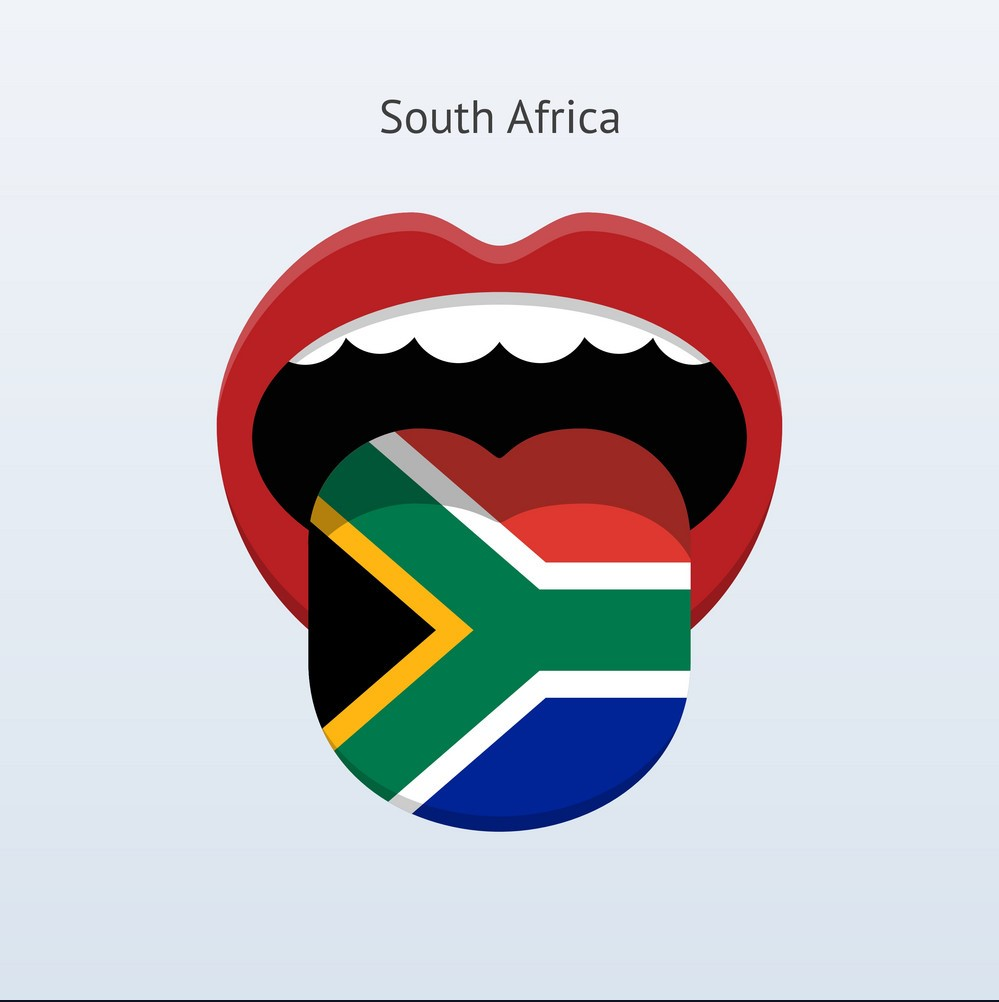

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading The Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>


   <a href=#six>6.1 Kaggle Submission CSV Files</a>
   

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue'})
import matplotlib.pyplot as plt
%matplotlib inline
# Libraries for data preparation and model building
from sklearn.linear_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
#Loading the data 
df_train = pd.read_csv('train_set.csv')
df_test =pd.read_csv('test_set.csv')

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Now for the exploration of the data. Firstly the following details of the data will be viewed: the data types, the number of columns and rows, does the data have any nulls? 
then an in depth exploration of the columns will be done. 

In [5]:
#checking for the datatypes for the train data
df_train.dtypes

lang_id    object
text       object
dtype: object

In [6]:
#checking the test data 
df_test.dtypes

index     int64
text     object
dtype: object

Looking at the shape of the train and test dataset.

In [7]:
df_train.shape

(33000, 2)

In [8]:
df_test.shape

(5682, 2)

Lastly checking for the any null values in the data.

In [9]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [10]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

From the above explorations it is noted that that data set is in intergers and object format. With the train data set having 33 000 rows and only two columns, and the test dataset having over 5 000 rows with two columns as well. With no nulls in any of these columns, it makes the data much complete.

Exploring the 'lang_id' to see the languages and how much of them are represented in the train data so far.

In [11]:
language_list = list(df_train.lang_id.unique())
print(language_list)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


Language Description
- xho : Xhosa
- eng : English
- nso : Northen Sotho (Sepedi)
- ven : Venda
- tsn : Tswana
- nbl : Ndebele
- zul : IsiZulu
- ssw : Siswati
- tso : Xisonga
- sot : SeSotho
- afr : Afrikaans

In [12]:
#to see the distrubution of the languages
df_train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

It would seem each language has 3 000 identified texts. It seems they are equally sampled. 

<AxesSubplot:>

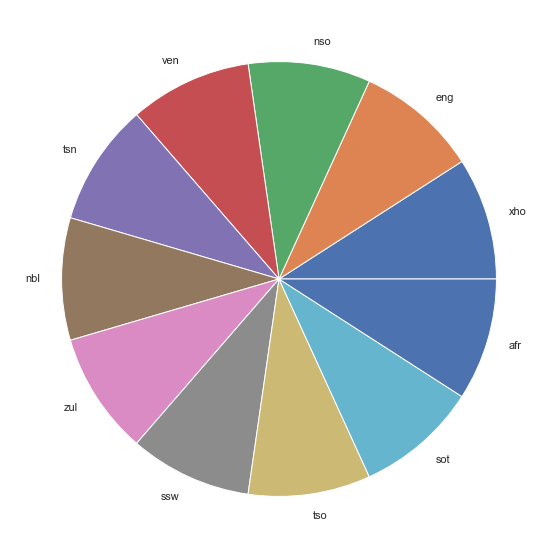

In [13]:
#piechart showing language sample distribution.
df_train.lang_id.value_counts().plot(kind='pie', ylabel="", figsize=(10,10))

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

For the data engineering, the data will be subject to changes that allow it to be firstly be accesible to the models later on. Secondly, these changes are to optimise the effieciency of the models to be used

first thing to be changed here is the removal of the capitalisation of the letter. This is done because normally capital letters clutter the data.

In [14]:
df_train['text'] = df_train['text'].str.lower()

In [15]:
df_test['text'] = df_test['text'].str.lower()

Now from the modifications done above it can be noted that changes done to the Train dataset are also applied to the Test dataset. This is for consistency. Making any change to one dataset and not applying it to the other might result in the findingings being incorrect and lead to the wrong conclusions.

Moving on, the next step will be the removal of punctuation marks for both the train and test dataset.

In [16]:
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

In [17]:
df_train['text'] = df_train['text'].apply(remove_punctuation)
df_train['text'].iloc[100]

'u anganelana na sisiteme dza nivho sa tsumbo ndivho ya ngwaniwapo i shumiswa yo angana na thekhinolodzhi ya tshizwinozwino ya bayothekhinolodzhi kha zwa mishonga na dziwe sekhitha kha u engedzedza tshiimo tsha vhubveledzi'

In [18]:
df_test['text'] = df_test['text'].apply(remove_punctuation)
df_test['text'].iloc[100]

'nietasbare niegeproduseerde bates welwillendheid gepatenteerde entiteite ens'

Having the data cleaned up a little, we can now proceed to make some changes that are a little advanced. Firstly tokenising the 'text' column will help models process the data much more effeciently and also provide the abillity to make more changes that optimise the model perfomance. 

In [19]:
tokeniser = TreebankWordTokenizer()
df_train['text'] = df_train['text'].apply(tokeniser.tokenize)
df_train['text'].iloc[100]

['u',
 'anganelana',
 'na',
 'sisiteme',
 'dza',
 'nivho',
 'sa',
 'tsumbo',
 'ndivho',
 'ya',
 'ngwaniwapo',
 'i',
 'shumiswa',
 'yo',
 'angana',
 'na',
 'thekhinolodzhi',
 'ya',
 'tshizwinozwino',
 'ya',
 'bayothekhinolodzhi',
 'kha',
 'zwa',
 'mishonga',
 'na',
 'dziwe',
 'sekhitha',
 'kha',
 'u',
 'engedzedza',
 'tshiimo',
 'tsha',
 'vhubveledzi']

In [20]:
#applying tokenisation to the test data too
df_test['text'] = df_test['text'].apply(tokeniser.tokenize)
df_test['text'].iloc[100]

['nietasbare',
 'niegeproduseerde',
 'bates',
 'welwillendheid',
 'gepatenteerde',
 'entiteite',
 'ens']

With these changes done. It is now possible to move on to the next phase, which is looking at the actual words in the dataset. this can be made possible by creating a bag of words which will serve basically as a dictionary that we can access and dissect and pick apart for convinience. The code below will allow the creation of the bag of words.

In [21]:
def bag_of_words_count(words, dictionary={}):
    for word in words:
        if word in dictionary.keys():
            dictionary[word] += 1
        else:
            dictionary[word] = 1
    return dictionary

In [22]:
text = {}
for pp in  list(df_train.lang_id.unique()):
    df = df_train.groupby('lang_id')
    text[pp] = {}
    for row in df.get_group(pp)['text']:
        text[pp] = bag_of_words_count(row, text[pp]) 

Now that the bag of words has been created, the following code will be responsible for allowing the creation of multiple features. But for now it allows for the exploration of the words in the bag of words.

In [23]:
all_words = set()
for pp in list(df_train.lang_id.unique()):
    for word in text[pp]:
        all_words.add(word)

In [24]:
text['all'] = {}
for ppp in list(df_train.lang_id.unique()):    
    for word in all_words:
        if word in text[pp].keys():
            if word in text['all']:
                text['all'][word] += text[pp][word]
            else:
                text['all'][word] = text[pp][word] 

Remember earlier it was mentioned that changes done in one dataset are advised to be applied to the other dataset? the changes above have been applied only to the train data because the test dataset lacks the 'lang_id' column. However there is a way to navigate throught this small issue, which is to create the column itself. But this method brings a new set of problems. Namely, the column will be empty and still, the changes applied above cant be applied to the new data.

Going back to the bag of words. The functions below makes possible the display of the number of words.

In [25]:
total_words = sum([v for v in text['all'].values()])
total_words

1293589

With the type of data that is being dealt with, seeing that it is in multiple languages. The word distribution is expected to be unique. That is to say it might not have a particular pattern to them in terms of frequency. but the functions below will make it possible to see the most frequent words and the least frequent ones. Having a look at the distribution of the 1.2 million words in the train dataset:

In [66]:
common_words_count = sum([v for v in text['all'].values() if v >= 500])
common_words_count

808115

In [68]:
rare_words_count= len([v for v in text['all'].values() if v <= 499])
rare_words_count

12092

It can be noticed that the thresholds for the rare words and common words are quite high. This is because it has to considered that many of the languages in South Africa share a common ancestory. Such as the Zulu, Swati, Xhosa and Ndebele people have been grouped as the bantu people or better known as the Nguni. this mean they share many words together because as a people they migrated from the east of Africa before they settled in South Africa. 
Same applies to the Pedi, Tswana and Sotho peoples. These are people who followed the route from central Africa before settling in South Africa, as such they share plenty of root words in their languages. With Languages such as Xitsonga sharing some root words with multiple groups such as the Nguni people and the pedi. 

Hence it is important to have a high treshold when the history of the people is taken into considerations. As diverse as all the peoples of South Africa are, they are still beautifully connected to each other. 

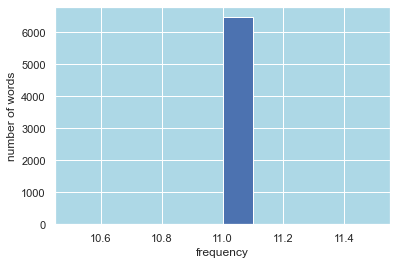

In [53]:
_ = plt.hist([])
plt.ylabel("number of words")
plt.xlabel("frequency")
figsize=(10, 7)

another thing that needs to be changed is the data type for the 'text' column. When modelling, the datatype: object, cant always be used. only inputs such as strings, floats and intergers can be used much easily.

In [29]:
df_train['text'] = df_train['text'].astype('string')
df_test['text'] = df_test['text'].astype('string')
df_test['text'].head()

0    ['mmasepala', 'fa', 'maemo', 'a', 'a', 'kgethe...
1    ['uzakwaziswa', 'ngokufaneleko', 'nakungafunek...
2    ['tshivhumbeo', 'tshi', 'fana', 'na', 'ngano',...
3    ['kube', 'inja', 'nelikati', 'betingevakala', ...
4            ['winste', 'op', 'buitelandse', 'valuta']
Name: text, dtype: string

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

With the data Explored and processed. The modelling can finally happen. In this phase, multiple models will be built and later the best perfoming one will be picked. Some of the models that are to be used are going to be Logistic regression, Naive and Bayes, Random Forest Classifier

In [30]:
#to train the data
X = df_train['text']
y = df_train['lang_id']

In [31]:
cv = CountVectorizer(min_df=1,max_df=0.9,ngram_range=(1, 2))
X_vect = cv.fit_transform(X)

In [32]:
X_vect.shape

(33000, 715993)

For the logistic regression.

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X_vect, y, test_size=0.17217, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr')
model_lr = lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [35]:
accuracy_score(y_test, pred_lr)

0.9948961633227736

In [37]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       501
         eng       1.00      1.00      1.00       534
         nbl       0.99      0.99      0.99       520
         nso       1.00      0.99      1.00       539
         sot       1.00      1.00      1.00       534
         ssw       0.99      1.00      0.99       506
         tsn       1.00      1.00      1.00       498
         tso       1.00      1.00      1.00       482
         ven       1.00      1.00      1.00       551
         xho       0.99      1.00      0.99       518
         zul       0.98      0.98      0.98       499

    accuracy                           0.99      5682
   macro avg       0.99      0.99      0.99      5682
weighted avg       0.99      0.99      0.99      5682



Now for the Naive and Bayes

In [38]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB(alpha=0.01)
model_cnb = cnb.fit(X_train, y_train)
pred_cnb = model_cnb.predict(X_test)

In [39]:
accuracy_score(y_test, pred_cnb)

0.9984160506863781

In [40]:
print(classification_report(y_test, pred_cnb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       501
         eng       1.00      1.00      1.00       534
         nbl       0.99      1.00      1.00       520
         nso       1.00      1.00      1.00       539
         sot       1.00      1.00      1.00       534
         ssw       1.00      1.00      1.00       506
         tsn       1.00      1.00      1.00       498
         tso       1.00      1.00      1.00       482
         ven       1.00      1.00      1.00       551
         xho       1.00      1.00      1.00       518
         zul       1.00      0.99      0.99       499

    accuracy                           1.00      5682
   macro avg       1.00      1.00      1.00      5682
weighted avg       1.00      1.00      1.00      5682



Another model from Naive and Bayes that can be used in this task is the Multinomial, this is a model that ...

In [41]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
mnb = MultinomialNB(alpha=0.01,fit_prior=True, class_prior=None)
model_mnb = mnb.fit(X_train, y_train)
pred_mnb = model_mnb.predict(X_test)

In [42]:
accuracy_score(y_test, pred_mnb)

0.9987680394227385

In [43]:
print(classification_report(y_test, pred_mnb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       501
         eng       1.00      1.00      1.00       534
         nbl       1.00      1.00      1.00       520
         nso       1.00      1.00      1.00       539
         sot       0.99      1.00      1.00       534
         ssw       1.00      1.00      1.00       506
         tsn       1.00      1.00      1.00       498
         tso       1.00      1.00      1.00       482
         ven       1.00      1.00      1.00       551
         xho       1.00      1.00      1.00       518
         zul       1.00      1.00      1.00       499

    accuracy                           1.00      5682
   macro avg       1.00      1.00      1.00      5682
weighted avg       1.00      1.00      1.00      5682



to train the Random forest classifier model

In [44]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest = forest.fit(X_train, y_train)
pred_forest = model_forest.predict(X_test)

In [45]:
accuracy_score(y_test, pred_forest)

0.9897923266455474

In [46]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       501
         eng       1.00      1.00      1.00       534
         nbl       0.99      0.95      0.97       520
         nso       1.00      0.99      1.00       539
         sot       1.00      1.00      1.00       534
         ssw       0.99      0.98      0.99       506
         tsn       1.00      1.00      1.00       498
         tso       1.00      1.00      1.00       482
         ven       1.00      1.00      1.00       551
         xho       0.98      0.98      0.98       518
         zul       0.94      0.98      0.96       499

    accuracy                           0.99      5682
   macro avg       0.99      0.99      0.99      5682
weighted avg       0.99      0.99      0.99      5682



<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

From the above models, it is clear to see that the multinomialNB model is the one that performs the best. From there, the next step will be to fine tuning the model so

Text(0.5, 0, 'Language')

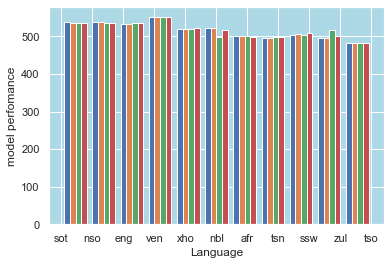

In [72]:
_ = plt.hist([pred_mnb, pred_cnb, pred_forest,pred_lr], bins=11)  
plt.ylabel("model perfomance")
plt.xlabel("Language")

<a id="six.one"></a>
## 6.1 Kaggle Submission CSV Files
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [47]:
#submissio for MultinomialNB
submission_df = pd.DataFrame(df_test['index'])
submission_df['lang_id'] = pred_mnb
submission_df.to_csv('submissiomnb.csv', index=False)
submission_df

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso
...,...,...
5677,5678,zul
5678,5679,tso
5679,5680,zul
5680,5681,sot


In [48]:
#submission for random forest
submission = pd.DataFrame(df_test['index'])
submission['lang_id'] = pred_forest
submission.to_csv('submission_forest.csv', index=False)
submission

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso
...,...,...
5677,5678,zul
5678,5679,tso
5679,5680,zul
5680,5681,sot


In [49]:
#submission file for ComplementCB
submission_cn = pd.DataFrame(df_test['index'])
submission_cn['lang_id'] = pred_cnb
submission_cn.to_csv('submission_cnb.csv', index=False)
submission_cn

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso
...,...,...
5677,5678,zul
5678,5679,tso
5679,5680,zul
5680,5681,sot


In [51]:
#submission file for logistic regression.
submission_l = pd.DataFrame(df_test['index'])
submission_l['lang_id'] = pred_lr
submission_l.to_csv('submission_lr.csv', index=False)
submission_l

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso
...,...,...
5677,5678,zul
5678,5679,tso
5679,5680,zul
5680,5681,sot


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>